## Exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rain_data = pd.read_csv('seattle_rain_train.csv')
test_data = pd.read_csv('seattle_rain_test.csv')

In [3]:
rain_data.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN,TMIDR,TRANGE,MONTH,SEASON,TMRW_RAIN,TMRW_PRCP,YEST_RAIN,YEST_PRCP,SUM7_PRCP,SUM14_PRCP,SUM30_PRCP
0,1948-01-30,0.03,47,30,1,38.5,17,1,1,1.0,0.21,1.0,0.22,0.35,0.56,4.28
1,1948-01-31,0.21,35,27,1,31.0,8,1,1,1.0,0.03,1.0,0.03,0.46,0.77,4.02
2,1948-02-01,0.03,39,30,1,34.5,9,2,1,0.0,0.00,1.0,0.21,0.49,0.80,3.46
3,1948-02-02,0.00,43,26,0,34.5,17,2,1,1.0,0.20,1.0,0.03,0.49,0.80,3.04
4,1948-02-03,0.20,38,26,1,32.0,12,2,1,1.0,0.14,0.0,0.00,0.69,1.00,2.93
5,1948-02-04,0.14,39,31,1,35.0,8,2,1,0.0,0.00,1.0,0.20,0.83,1.14,2.90
6,1948-02-05,0.00,36,26,0,31.0,10,2,1,0.0,0.00,1.0,0.14,0.61,0.93,2.46
7,1948-02-06,0.00,43,20,0,31.5,23,2,1,1.0,0.06,0.0,0.00,0.58,0.93,2.05
8,1948-02-07,0.06,43,27,1,35.0,16,2,1,1.0,0.56,0.0,0.00,0.43,0.89,2.07
9,1948-02-08,0.56,44,35,1,39.5,9,2,1,0.0,0.00,1.0,0.06,0.96,1.45,2.51


In [4]:
test_data.head()

,Id,PRCP,TMAX,TMIN,RAIN,TMIDR,TRANGE,MONTH,SEASON,YEST_RAIN,YEST_PRCP,SUM7_PRCP,SUM14_PRCP,SUM30_PRCP
0,0,0.00,49,37,0,43.0,12,2,1,0.0,0.00,0.20,0.87,2.33
1,1,0.25,63,56,1,59.5,7,9,3,0.0,0.00,0.25,0.30,0.73
2,2,0.11,50,38,1,44.0,12,1,1,1.0,0.15,1.67,2.31,4.11
3,3,0.09,61,48,1,54.5,13,5,2,0.0,0.00,0.15,0.81,2.72
4,4,0.04,69,54,1,61.5,15,6,2,0.0,0.00,0.66,1.97,2.42


In [5]:
len(rain_data)

18964

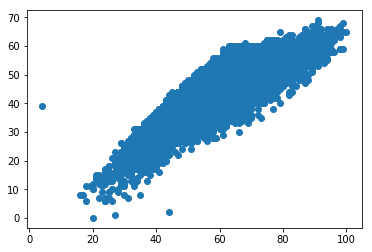

In [6]:
plt.scatter(rain_data['TMAX'], rain_data['TMIN'])

In [73]:
from sklearn.utils import shuffle
val_data_2 = shuffle(rain_data)

## Set-up up for creating models

In [3]:
features = ['TMAX', 'TMIN', 'TMIDR', 'RAIN', 'MONTH', 'SEASON', 'YEST_RAIN', 'PRCP', 'YEST_PRCP', 'TRANGE', 'SUM7_PRCP', 'SUM14_PRCP']
target = 'TMRW_RAIN'

In [55]:
# I used 20% of the train dataset to creat the validation dataset
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(rain_data, test_size=0.21, random_state=0)

## Model 1: Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(train_data[features], train_data[target])

In [6]:
from sklearn.metrics import accuracy_score

lr_val_predictions = lr_model.predict(validation_data[features])
lr_val_predictions = abs(np.round(lr_val_predictions, 0))

accuracy_score(validation_data[target], lr_val_predictions)

0.7118375955707883

Typically Linear Regression would not be used for a classification problem since it is highly likely that it will produce predictions that cannot be treated as binary values; however, given the features that I focused on I believe that a linear relation can be noticed between most of the columns hence I have reason to believe the existence of correlation between the predictors. Rounding the predictions to whole numbers allows us to treat them as binary and offers surprsingly accurate results on the validation data. However, due to having few features there is a good chance of overfitting.

## Model 2: Boosting

In [7]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train_data[features], train_data[target])

In [8]:
ab_val_predictions = ab_model.predict(validation_data[features])
accuracy_score(validation_data[target], ab_val_predictions)

0.7223833377273926

Next I decided to use Adaptive Boosting with the hopes of using the lack of apparent outliers and building upon weak predictions to come up with a strong model. I ended up using 50 estimators after testing multiple values and seeing their accuracy as well as the ROC curve that they produce.

## Model 3: Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression(penalty='l2', random_state = 1, C = 100).fit(train_data[features], train_data[target])
logr_model.coef_

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.02172834,  0.00813347, -0.00679743,  0.95362148,  0.04268886,
        -0.16499407,  0.13572905,  1.18433021, -0.07376054, -0.02986181,
         0.08953042,  0.02703713]])

In [10]:
logr_train_predictions = logr_model.predict(train_data[features])
accuracy_score(train_data[target], logr_train_predictions)

0.7097752290554347

In [11]:
logr_val_predictions = logr_model.predict(validation_data[features])
accuracy_score(validation_data[target], logr_val_predictions)

0.7139467440021091

Next I used Logistic Regression since it is the primary classification model that I have worked with and it is relatively simple to use. It also helped me eliminate predictors that were not very useful such as the sums of precipitation.

## Model 4: Decision Tree/Random Forest

In [12]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=5,random_state=0).fit(train_data[features], train_data[target])

In [13]:
dt_val_predictions = decision_tree_model.predict(validation_data[features])
accuracy_score(validation_data[target], dt_val_predictions)

0.723437911943053

In [71]:
from sklearn.ensemble import RandomForestClassifier
randf_model = RandomForestClassifier(max_depth=7, random_state=0, criterion='entropy', min_samples_leaf=5).fit(train_data[features], train_data[target])

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:
randf_val_predictions = randf_model.predict(validation_data[features])
accuracy_score(validation_data[target], randf_val_predictions)

0.7233241275420538

In [90]:
from sklearn.ensemble import VotingClassifier
rr = VotingClassifier(estimators=[('ab', ab_model), ('dt', decision_tree_model), ('rf', randf_model)]).fit(train_data[features], train_data[target])
rr_pred = rr.predict(validation_data[features])
accuracy_score(validation_data[target], rr_pred)

0.7220687923675622

Using decision trees with a max_depth of 7 allows for efficient splitting of data. It also helps to make good use of the categorical data provided in the dataset. Next, using a random forest allows for using multiple trees to form a collective prediction which provides us with the highest accuracy from all the methods used.

## Model 5: Neural Net

In [16]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=25, random_state=0).fit(train_data[features], train_data[target])

In [17]:
nn_val_predictions = nn_model.predict(validation_data[features])
accuracy_score(validation_data[target], nn_val_predictions)

0.7168468230951753

In [43]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'hidden_layer_sizes':[5, 10, 20, 25, 30, 25]}
search = GridSearchCV(MLPClassifier(), hyperparameters, cv=6, return_train_score=True).fit(train_data[features], train_data[target])
search.best_params_

{'hidden_layer_sizes': 25}

While it can be hard to interpret neural nets, they also provide a high quality of adaptive learning while optimizng the solution as it works while also minimizing bias. Using a relatively small layer size due to there not being many features allowed the gradient descent algorithm that it is based on to provide accurate results.

## ROC plot and creating submission

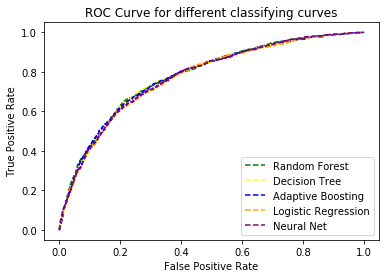

In [18]:
import sklearn.metrics as metrics

probs = randf_model.predict_proba(validation_data[features])[:,1]
fprs, tprs, thresholds = metrics.roc_curve(validation_data[target], probs)

probs2 = decision_tree_model.predict_proba(validation_data[features])[:,1]
fprs2, tprs2, thresholds2 = metrics.roc_curve(validation_data[target], probs2)

probs3 = ab_model.predict_proba(validation_data[features])[:,1]
fprs3, tprs3, thresholds3 = metrics.roc_curve(validation_data[target], probs3)

probs4 = logr_model.predict_proba(validation_data[features])[:,1]
fprs4, tprs4, thresholds4 = metrics.roc_curve(validation_data[target], probs4)

probs5 = nn_model.predict_proba(validation_data[features])[:,1]
fprs5, tprs5, thresholds5 = metrics.roc_curve(validation_data[target], probs5)

plt.plot(fprs, tprs, '--', color='green', label='Random Forest')
plt.plot(fprs2, tprs2, '--', color='yellow', label='Decision Tree')
plt.plot(fprs3, tprs3, '--', color='blue', label='Adaptive Boosting')
plt.plot(fprs4, tprs4, '--', color='orange', label='Logistic Regression')
plt.plot(fprs5, tprs5, '--', color='purple', label='Neural Net')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifying curves')
plt.legend(loc='lower right')

In [19]:
randf_val_predictions.astype(int)

array([0, 1, 1, ..., 0, 0, 0])

In [20]:
randf_test_predictions = randf_model.predict(test_data[features])
randf_test_predictions

array([0., 1., 1., ..., 0., 0., 1.])

In [21]:
predictions = randf_test_predictions.astype(int)
to_save = test_data[['Id']].copy()
to_save.loc[:, 'Category'] = predictions
to_save.to_csv('submission.csv', index=False)